<a href="https://colab.research.google.com/github/jiiwon129/EWHA/blob/main/HW5_DL_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem 1. Short Question**

**(a) RNN은 recurrence concept을 구현한 model이다. Recurrence concept에 대하여 서술하시오.**

Recurrence concept이란 과거의 정보를 기억하면서, 새로운 정보를 받아들임과 동시에 과거의 정보와 새로운 정보에 대한 새로운 관계를 추론해 내가는 관계이다.

**(b) RNN의 hidden layer안에서 일어나는 식에 대해 서술하시오.**

일반적으로 타임 스텝 t에서의 셀의 상태 $h_t$는 그 타임 스텝의 입력과 이전 타임 스텝의 상태에 대한 함수이다.

$h_t$ = $f(h_{t-1}, x_t)$
- 타임 스텝 t에서의 출력 $y_t$도 이전 상태와 현재 입력에 대한 함수
- 현재 시험 t에서의 hidden layer를 거치며 계산된 값

Hidden layer: $h_t$ = tanh ($W_x x_t$ + $W_h h_{t-1}$ + $b$)
- $W_x$: 입력값에 대한 가중치
- $W_h$: 이전 시점인 t-1인 hidden layer에서 계산된 $h_{t-1}$을 위한 가중치

정리하자면, 입력값으로 들어온 $x_t$와 이전 시점에서 계산된 $h_{t-1}$을 이용하여 현재 시점 t의 $h_t$가 계산된다. 이 값은 두 번 쓰이게 되는데, 현재 시점 t의 출력값인 $\hat y_t$를 계산하는데 쓰이고, 다음 시점의 $h_{t+1}$을 구하는데 쓰인다.

**(c) LSTM은 Simple RNN(Vanilla RNN)의 어떤 단점을 보안한 모델인지 서술하시오.**

Simple RNN에서는 단기 기억상실의 문제가 발생한다. RNN에서 매 타임 스텝을 거치면서 일부 정보가 사라지게 되는데, 어느 정도의 시간이 지나면 RNN에서 첫 번째 입력의 흔적은 거의 남아있지 않는다.

이처럼 Simple RNN은 장기 기억을 보존하지 못한다는 문제가 있는데, 이를 보완한 RNN model이 LSTM(Long Short-Term Memory)이다.

LSTM은 은닉층의 메모리 셀에 입력 게이트, 삭제 게이트, 출력 게이트를 추가하여 불필요한 정보를 지우고 장기 상태에 저장할 정보를 정한다. 결론적으로 LSTM은 은닉 상태를 계산하는 식이 좀 더 복잡해지며, 장기 기억을 저장하기 위해 셀 상태(cell state, $c_t$)라는 값을 추가하게 된다.

**(d) LSTM은 입력 게이트, 삭제 게이트, 출력 게이트 3개의 게이트로 구성되어 있다. 각 게이트의 역할에 대해 서술하시오.**

1. 입력 게이트(input gate)
  - 현재의 정보를 기억하는 게이트
  - 즉, 현재 시점의 입력값과 이전 은닉 상태를 바탕으로 얼마만큼의 새로운 정보를 셀 상태에 반영할 지 결정

2. 삭제 게이트(forget gate)
  - 장기 상태의 어느 부분이 삭제되어야 하는지 제어하는 게이트
  - 즉, 이전 셀 상태로부터 얼마만큼의 정보를 삭제할 지를 결정
  - 최종 sigmoid 함수를 지나면 0과 1 사이의 값이 반환
    - 0에 가까울수록 정보가 많이 삭제된 것(과거의 정보가 중요하지 않음)
    - 1에 가까울수록 정보를 많이 기억한 것(과거의 정보가 중요함)

3. 출력 게이트(output gate)
  - 현재의 은닉 상태를 생성하는 게이트
  - 셀 상태를 바탕으로 최종 출력으로 어떤 정보를 내보낼 지 결정


**(e) LSTM와 GRU의 차이점에 대해 서술하시오.**

LSTM (Long Short-Term Memory)
- 시계열 데이터, 긴 문장, 오디오 신호 등과 같이 장기적인 의존성을 가지는 데이터에서 좋은 성능을 보인다.
- 내부에 3개의 게이트가 존재하며, 각 게이트가 정보를 선택적으로 기억하거나 잊고, 출력하는 과정을 제어한다.
  - 입력 게이트(Input Gate): 어떤 새로운 정보를 기억할지 결정
  - 삭제 게이트(Forget Gate): 과거의 어떤 정보를 잊을지 결정
  - 출력 게이트(Output Gate): 셀 상태에서 어떤 정보를 출력할지 결정

GRU (Gated Recurrent Unit)
- LSTM을 간소화한 구조로, 계산 효율성과 학습 속도를 높이기 위해 설계되었다.
- 내부에 2개의 게이트가 존재하며, 셀 상태와 hidden state가 분리되지 않고 하나로 통합되어 있다.
  - 업데이트 게이트(Update Gate): 과거 정보를 얼마나 유지할지 결정 (입력 + 삭제 게이트 역할)
  - 리셋 게이트(Reset Gate): 새로운 입력과 과거 정보를 어떻게 결합할지 결정

### **Problem 2. IMDB**

IMDB data는 영화 리뷰 데이터로 리뷰가 긍정인 경우 1, 부정인 경우 0으로 표시한 label로 구성된 데이터이다. Chapter 5 교안을 참고하여 데이터를 다운로드하시오.

**(a) 데이터를 feature와 label로 나누시오.**

In [ ]:
# Processing the labels of the raw IMDB data
import os
imdb_dir = '/content/drive/MyDrive/BBB data/IMDB'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
       labels.append(1)

**(b) 데이터에 대하여 토큰화를 실행하시오.**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:',data.shape)
print('Shape of label tensor:',labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


**(c) train data는 20000개, validation data는 5000개로 분리하시오.**

In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

training_samples = 20000
validation_samples = 5000

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

**(d) 딥러닝 모델을 정의할 때 모델의 하이퍼 파라미터는 모델의 성능에 영향을 준다. 따라서,
좋은 성능의 모델을 찾기 위해선 은닉층의 개수, 층마다 있는 뉴런의 개수, 각 층에서 사용하는 활성화 함수, 가중치 초기화, 에포트, 배치 사이즈 등 다양한 하이퍼 파라미터에
변화를 주며 최적의 조합을 찾아내야 한다. Keras를 이용하여 모델을 정의하도록 하며, 위
에서 언급한 하이퍼 파라미터의 설정에 변화를 주어 각각 다른 5개의 모델을 정의하시오.
(모델에 대한 코드를 반드시 첨부할 것.)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

Model1을 기본 모델 정의 후, 나머지 4개의 모델은 Model1에서 하이퍼 파라미터를 변경하는 식으로 정의

Model1
- 기본 모델 설정
- Activation Function: relu
- hidden layer 1개
- Optimizer: rmsprop

In [ ]:
model1 = Sequential()
model1.add(Embedding(max_words, 100, input_length=maxlen))
model1.add(Flatten())
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history1 = model1.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.6968 - loss: 0.5471 - val_acc: 0.8472 - val_loss: 0.3479
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9401 - loss: 0.1663 - val_acc: 0.8252 - val_loss: 0.4297
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9933 - loss: 0.0260 - val_acc: 0.8192 - val_loss: 0.6480
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9989 - loss: 0.0040 - val_acc: 0.8182 - val_loss: 0.7695
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9999 - loss: 3.3749e-04 - val_acc: 0.8160 - val_loss: 0.8439
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9999 - loss: 4.8249e-04 - val_acc: 0.8142 - val_loss: 0.8822
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 1.0000 - loss: 3.5212e-05 - val_acc: 0.8148 - val_loss: 0.9094
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 1.0000 - loss: 2.5388e-05 - val_acc: 0.8148 - val_loss: 0.9230
Epoch 9/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Model2
- 뉴런 수 증가
- Optimizer: adam
- epochs 감소

In [ ]:
model2 = Sequential()
model2.add(Embedding(max_words, 100, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history2 = model2.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.7001 - loss: 0.5400 - val_acc: 0.8474 - val_loss: 0.3435
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9668 - loss: 0.0983 - val_acc: 0.8218 - val_loss: 0.5313
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.9966 - loss: 0.0116 - val_acc: 0.8242 - val_loss: 0.6700
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9998 - loss: 0.0013 - val_acc: 0.8260 - val_loss: 0.7276
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 1.0000 - loss: 1.9382e-04 - val_acc: 0.8266 - val_loss: 0.7595
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 1.0000 - loss: 9.3326e-05 - val_acc: 0.8278 - val_loss: 0.7843
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 1.0000 - loss: 5.7183e-05 - val_acc: 0.8278 - val_loss: 0.8044
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 1.0000 - loss: 3.6983e-05 - val_acc: 0.8288 - val_loss: 0.8232
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 

Model3
- hidden layer 2개
- Activation Function: tanh

In [ ]:
model3 = Sequential()
model3.add(Embedding(max_words, 100, input_length=maxlen))
model3.add(Flatten())
model3.add(Dense(64, activation='tanh'))
model3.add(Dense(32, activation='tanh'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history3 = model3.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.6990 - loss: 0.5394 - val_acc: 0.8170 - val_loss: 0.4078
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9481 - loss: 0.1501 - val_acc: 0.8118 - val_loss: 0.4817
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9964 - loss: 0.0162 - val_acc: 0.8048 - val_loss: 0.8196
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9993 - loss: 0.0032 - val_acc: 0.8018 - val_loss: 1.2665
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9998 - loss: 4.8475e-04 - val_acc: 0.8006 - val_loss: 1.4629
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9999 - loss: 4.0049e-04 - val_acc: 0.7980 - val_loss: 1.5294
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 1.0000 - loss: 5.4045e-06 - val_acc: 0.8012 - val_loss: 1.5416
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 1.0000 - loss: 2.6251e-06 - val_acc: 0.8010 - val_loss: 1.5493
Epoch 9/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 

Model4
- he_normal 초기화 사용

In [ ]:
from tensorflow.keras import initializers

model4 = Sequential()
model4.add(Embedding(max_words, 100, input_length=maxlen))
model4.add(Flatten())
model4.add(Dense(32, activation='relu', kernel_initializer=initializers.he_normal()))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history4 = model4.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.7035 - loss: 0.5368 - val_acc: 0.8394 - val_loss: 0.3602
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9661 - loss: 0.1059 - val_acc: 0.8214 - val_loss: 0.4746
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9973 - loss: 0.0132 - val_acc: 0.8342 - val_loss: 0.5713
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9993 - loss: 0.0032 - val_acc: 0.8214 - val_loss: 0.6620
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 1.0000 - loss: 6.7006e-04 - val_acc: 0.8334 - val_loss: 0.6493
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 1.0000 - loss: 1.7345e-04 - val_acc: 0.8378 - val_loss: 0.6676
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 1.0000 - loss: 9.9959e-05 - val_acc: 0.8392 - val_loss: 0.6852
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 1.0000 - loss: 6.4566e-05 - val_acc: 0.8402 - val_loss: 0.7019
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Model5
- Dropout 추가
- hidden layer 2개
- batch size 증가

In [ ]:
from tensorflow.keras.layers import Dropout

model5 = Sequential()
model5.add(Embedding(max_words, 100, input_length=maxlen))
model5.add(Flatten())
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history5 = model5.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - acc: 0.6196 - loss: 0.6192 - val_acc: 0.8392 - val_loss: 0.3677
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - acc: 0.9080 - loss: 0.2376 - val_acc: 0.7964 - val_loss: 0.5129
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9802 - loss: 0.0622 - val_acc: 0.8118 - val_loss: 0.6994
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9951 - loss: 0.0150 - val_acc: 0.8232 - val_loss: 0.9315
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9983 - loss: 0.0068 - val_acc: 0.8220 - val_loss: 1.1564
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9991 - loss: 0.0030 - val_acc: 0.8182 - val_loss: 1.2291
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9991 - loss: 0.0029 - val_acc: 0.8248 - val_loss: 1.3640
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9991 - loss: 0.0025 - val_acc: 0.8218 - val_loss: 1.4674
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

**(e) (d)의 결과에 대하여 모델별로 confution matrix를 구하시오. 어떤 모델의 성능이 가장 좋은
가?**

In [ ]:
# Tokenizing the data of the test set

test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

y_pred1 = (model1.predict(x_test) > 0.5).astype("int32")
y_pred2 = (model2.predict(x_test) > 0.5).astype("int32")
y_pred3 = (model3.predict(x_test) > 0.5).astype("int32")
y_pred4 = (model4.predict(x_test) > 0.5).astype("int32")
y_pred5 = (model5.predict(x_test) > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
def evaluate_model(name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    print(f"\n {name} - Confusion Matrix")
    print(cm)
    print(f"Accuracy: {acc:.4f}")

evaluate_model("Model 1", y_test, y_pred1)
evaluate_model("Model 2", y_test, y_pred2)
evaluate_model("Model 3", y_test, y_pred3)
evaluate_model("Model 4", y_test, y_pred4)
evaluate_model("Model 5", y_test, y_pred5)


 Model 1 - Confusion Matrix
[[10196  2304]
 [ 2166 10334]]
Accuracy: 0.8212

 Model 2 - Confusion Matrix
[[10446  2054]
 [ 2057 10443]]
Accuracy: 0.8356

 Model 3 - Confusion Matrix
[[10108  2392]
 [ 2391 10109]]
Accuracy: 0.8087

 Model 4 - Confusion Matrix
[[10385  2115]
 [ 2033 10467]]
Accuracy: 0.8341

 Model 5 - Confusion Matrix
[[10126  2374]
 [ 2319 10181]]
Accuracy: 0.8123


상대적으로 뉴런 수를 증가시키고, Optimizer를 adam 설정. epochs 상대적으로 감소하여 학습시킨 Model2가 정확도 0.8356으로 가장 높게 나왔다. 따라서 Model2의 성능이 가장 좋다고 볼 수 있다.

**(f) (d)에서 정의한 모델 중 하나를 선택하여 callback option을 설정하여 학습을 진행할 것이다.
epoch=100, batch_size=32으로 설정한 후, Call back option을 사용하여 model의 accuracy가 20
번 동안 좋아지지 않으면 학습을 멈추도록 설정하시오. 또한, training history를 시각화하여
plot을 첨부하시오.**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

early_stop = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=20,
    restore_best_weights=True
)

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history2 = model2.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val),
                      callbacks=[early_stop])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.9983 - loss: 0.0046 - val_acc: 0.8080 - val_loss: 1.1707
Epoch 2/100


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: acc,loss,val_acc,val_loss
  current = self.get_monitor_value(logs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.9968 - loss: 0.0101 - val_acc: 0.8164 - val_loss: 1.0906
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.9999 - loss: 6.2883e-04 - val_acc: 0.8194 - val_loss: 1.1357
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9998 - loss: 7.5527e-04 - val_acc: 0.8162 - val_loss: 1.1555
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 1.0000 - loss: 1.6194e-05 - val_acc: 0.8160 - val_loss: 1.1681
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 1.0000 - loss: 9.1707e-06 - val_acc: 0.8168 - val_loss: 1.1810
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 1.0000 - loss: 6.3179e-06 - val_acc: 0.8172 - val_loss: 1.1949
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 1.0000 - loss: 4.9132e-06 - val_acc: 0.8186 - val_loss: 1.2092
Epoch 9/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 1.0000 - loss: 3.8610e-06 - val_acc: 0.8184 - val_loss: 1.2242
Epoch 10/100
625/625 ━━━━━━━━━━━

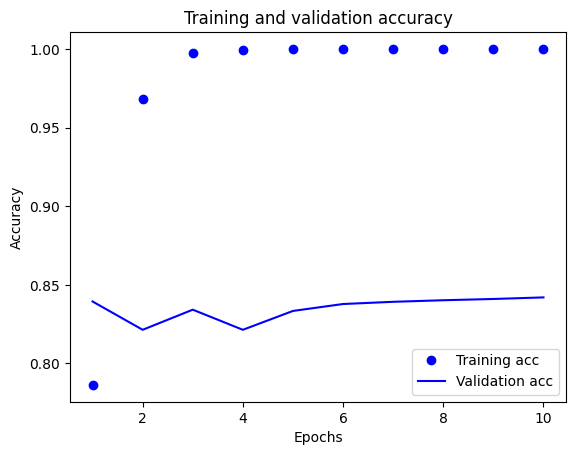

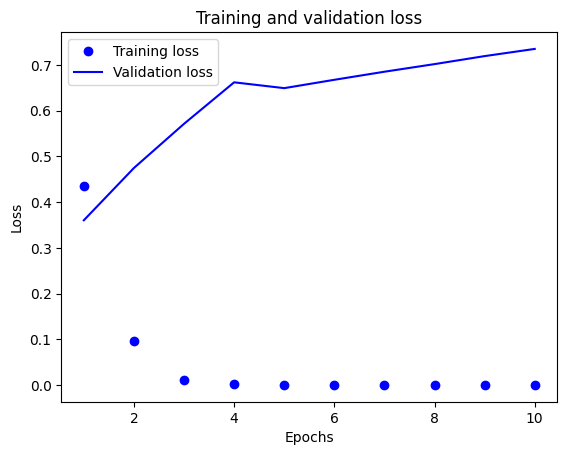

In [ ]:
import matplotlib.pyplot as plt

acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

# accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()